# Análise Exploratória e Pré-processamento de Dados
**Autor**: Breno Diógenes Fernandes  
**Matrícula**: 4052025000090  
**Dataset**: 2024 Property Tax Roll


## 1. Definição do Problema

- **Descrição do problema:**  
  Este projeto analisa registros de impostos sobre propriedades para entender padrões de avaliação e cobrança de impostos, identificar outliers e fornecer insights relevantes que podem auxiliar em políticas públicas e decisões fiscais.

- **Tipo de problema:**  
  Aprendizado **não supervisionado** com foco em análise exploratória e pré-processamento.

- **Hipóteses:**  
  - Existe correlação entre valor do imóvel e imposto pago.  
  - Cidades com maior valor de avaliação tendem a concentrar maior arrecadação.  
  - Existem outliers que podem impactar análises estatísticas.

- **Restrições:**  
  Dados públicos da base da Filadélfia com estrutura padronizada. Utilizou-se apenas os atributos já presentes na base original.

- **Atributos do dataset:**  
  - P_ID: Identificador da propriedade  
  - TAX_MAP: Código fiscal geográfico  
  - plat, lot, unit: Dados de subdivisão do imóvel  
  - CLASS, SHORT_DESC: Classificação e descrição do imóvel  
  - LEVY_CODE_1, SHORT_DESC 1: Código de arrecadação e descrição  
  - CIVIC, STREET, SUFFIX, FORMATED_ADDRESS, CITY, ZIP_POSTAL: Endereço do imóvel  
  - FIRST_NAME, LAST_NAME, COMPANY, FREE_LINE_2: Nome(s) do proprietário  
  - CIVIC 1, STREET 1, S_SUFFIX, UNIT, CITY 1, STATE, ZIP_POSTAL 1: Endereço de correspondência  
  - TOTAL_ASSMT: Valor de avaliação do imóvel  
  - TOTAL_EXEMPT: Valor isento  
  - TOTAL_TAXES: Imposto total cobrado  
  - Property_Location: Localização oficial


## 2. Análise de Dados

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/2024_Property_Tax_Roll.csv')
df.head()


,P_ID,TAX_MAP,plat,lot,unit,CLASS,SHORT_DESC,LEVY_CODE_1,SHORT_DESC 1,CIVIC,...,STREET 1,S_SUFFIX,UNIT,CITY 1,STATE,ZIP_POSTAL 1,TOTAL_ASSMT,TOTAL_EXEMPT,TOTAL_TAXES,Property_Location
0,12.0,000-0001-0022,0.0,1.0,0022,10.0,Utility,C01,C01,NaN,...,NaN,NaN,NaN,Addison,TX,75001,6160000.0,0.0,216216.00,POINT (-71.412747 41.824461)
1,8895.0,028-0891-0000,28.0,891.0,0000,2.0,2 -5 Family,NO01,NO01,10.0,...,NaN,ST,NaN,East Providence,RI,02914-0215,456000.0,0.0,8367.60,POINT (-71.43000797 41.822354017)
2,24421.0,065-0302-0000,65.0,302.0,0000,2.0,2 -5 Family,OO01,OO01,52.0,...,Bergen,St,NaN,Providence,RI,02908,337800.0,0.0,3533.24,POINT (-71.439613966 41.83059699)
3,24426.0,065-0307-0000,65.0,307.0,0000,2.0,2 -5 Family,NO01,NO01,39.0,...,Dougals,Ave,NaN,North Providence,RI,02904,374900.0,0.0,6879.44,POINT (-71.440014034 41.830921998)
4,24431.0,065-0312-0000,65.0,312.0,0000,1.0,Single Family,NO01,NO01,21.0,...,Country Club,Dr,NaN,Randolph,MA,02368,207700.0,0.0,3811.32,POINT (-71.44015703 41.831580019)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44034 entries, 0 to 44033
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   P_ID               44033 non-null  float64
 1   TAX_MAP            44033 non-null  object 
 2   plat               44033 non-null  float64
 3   lot                44033 non-null  float64
 4   unit               44033 non-null  object 
 5   CLASS              44033 non-null  float64
 6   SHORT_DESC         44033 non-null  object 
 7   LEVY_CODE_1        44033 non-null  object 
 8   SHORT_DESC 1       44033 non-null  object 
 9   CIVIC              43938 non-null  float64
 10  STREET             44031 non-null  object 
 11  SUFFIX             42442 non-null  object 
 12  FORMATED_ADDRESS   44031 non-null  object 
 13  CITY               43999 non-null  object 
 14  ZIP_POSTAL         42598 non-null  object 
 15  FIRST_NAME         34296 non-null  object 
 16  LAST_NAME          343

In [7]:
df.describe()

,P_ID,plat,lot,CLASS,CIVIC,TOTAL_ASSMT,TOTAL_EXEMPT,TOTAL_TAXES
count,44033.000000,44033.000000,44033.000000,44033.000000,43938.000000,4.403300e+04,4.403300e+04,4.403300e+04
mean,29385.422706,64.114664,329.507256,9.657234,177.369475,6.333056e+05,2.394807e+05,7.544497e+03
std,18966.827872,35.189694,235.459833,18.092440,247.141559,5.326969e+06,5.213656e+06,3.682821e+04
min,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,14381.000000,34.000000,137.000000,1.000000,36.000000,2.382000e+05,0.000000e+00,2.496680e+03
50%,27966.000000,64.000000,291.000000,2.000000,89.000000,3.118000e+05,0.000000e+00,3.890200e+03
75%,40773.000000,94.000000,478.000000,13.000000,196.000000,4.462000e+05,0.000000e+00,6.393160e+03
max,79006.000000,129.000000,1197.000000,84.000000,1955.000000,7.087266e+08,7.087266e+08,2.918528e+06


A tabela abaixo fornece um resumo estatístico dos principais atributos numéricos do dataset:

| Atributo         | Descrição                                                                 |
|------------------|---------------------------------------------------------------------------|
| `P_ID`           | Identificador único da propriedade. Utilizado apenas como chave primária. |
| `plat`, `lot`, `CLASS` | Identificadores geográficos e classificação do imóvel. Podem ser categorizados. |
| `CIVIC`          | Número da propriedade no endereço. Pode ajudar na localização.            |
| `TOTAL_ASSMT`    | Valor de avaliação da propriedade. Média de **\$633 mil**, mediana de **\$311 mil** e máximo de **\$708 milhões**, com desvio-padrão muito elevado (**\$5,3 milhões**), indicando forte presença de outliers. |
| `TOTAL_EXEMPT`   | Valor isento de imposto. A maioria dos imóveis tem isenção zero, mas o valor máximo é igual ao valor máximo de avaliação, sugerindo propriedades **100% isentas** (como instituições públicas ou sociais). |
| `TOTAL_TAXES`    | Total de impostos cobrados. Média de **\$7.544**, mediana de **\$3.890**, máximo de **\$2.918.528**, novamente com **assimetria positiva** e presença de **outliers extremos**. |

---

### Insights Importantes:

- **Distribuição Assimétrica**: A diferença entre média e mediana, além dos altos valores máximos, indica **distribuição assimétrica à direita** e presença de **outliers**.
- **Propriedades Isentas**: A coincidência entre os valores máximos de avaliação e isenção sugere imóveis **totalmente isentos** — como **igrejas, escolas públicas, ou ONGs**.
- **Concentração da Arrecadação**: A maioria dos imóveis paga entre \$2.000 e \$6.000 de imposto, mas alguns pagam valores altíssimos, indicando **forte concentração da arrecadação** em poucos imóveis.
- **Recomendações**:
  - Utilizar **mediana** em vez de média como métrica de tendência central.
  - Aplicar **boxplots e transformações** para lidar com outliers.
  - Avaliar a possibilidade de **clusterização** por faixas de avaliação e imposto para políticas diferenciadas.

Esses achados ajudam a orientar futuras análises e políticas de arrecadação mais justas e segmentadas.

In [8]:
df.isnull().sum()

,0
P_ID,1
TAX_MAP,1
plat,1
lot,1
unit,1
CLASS,1
SHORT_DESC,1
LEVY_CODE_1,1
SHORT_DESC 1,1
CIVIC,96


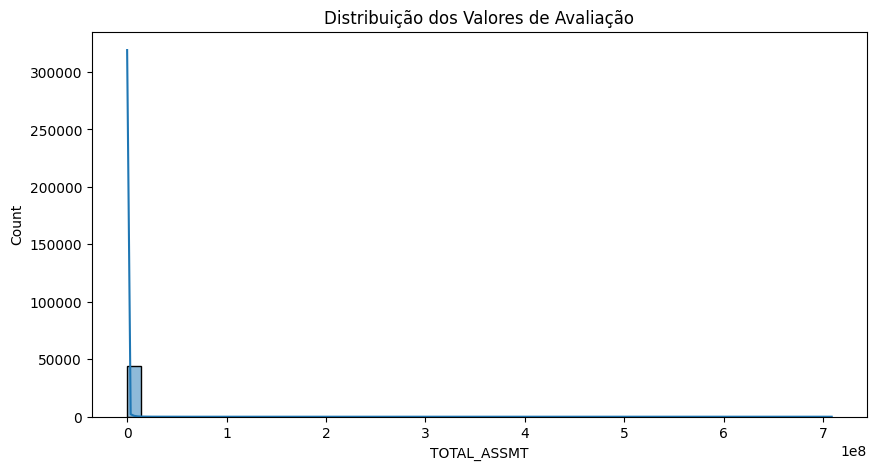

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df['TOTAL_ASSMT'], bins=50, kde=True)
plt.title("Distribuição dos Valores de Avaliação")
plt.show()

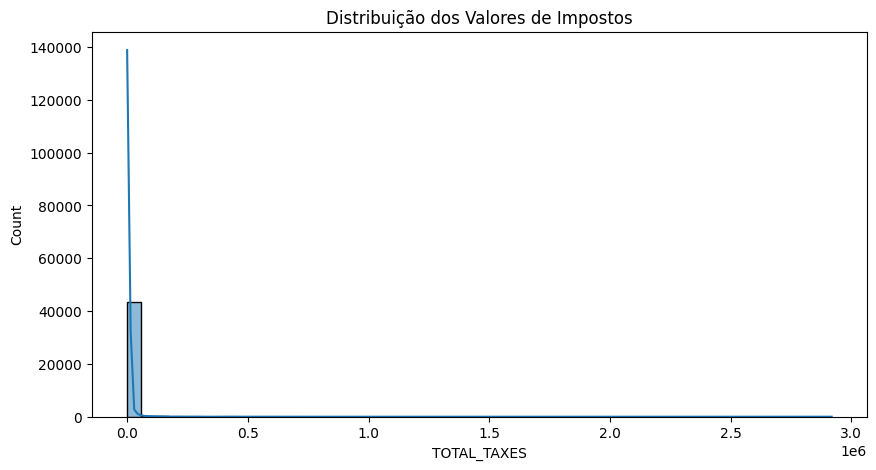

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['TOTAL_TAXES'], bins=50, kde=True)
plt.title("Distribuição dos Valores de Impostos")
plt.show()

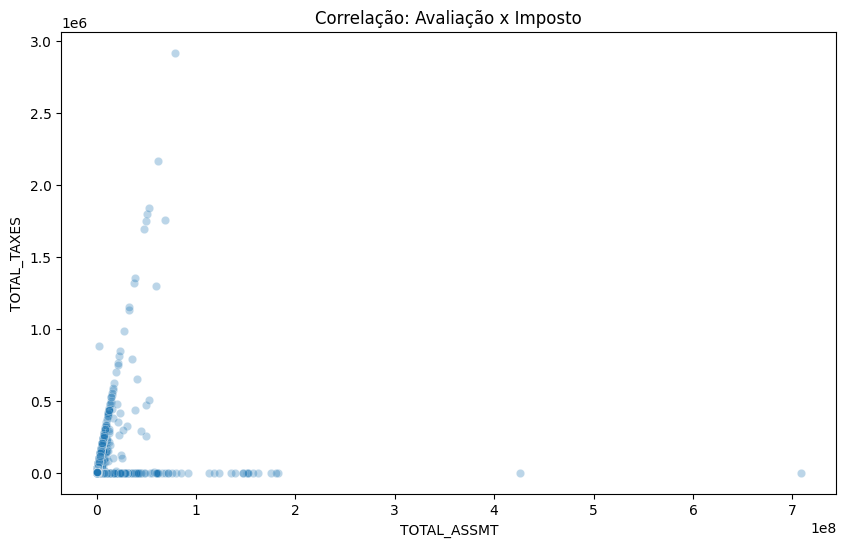

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TOTAL_ASSMT', y='TOTAL_TAXES', alpha=0.3)
plt.title("Correlação: Avaliação x Imposto")
plt.show()

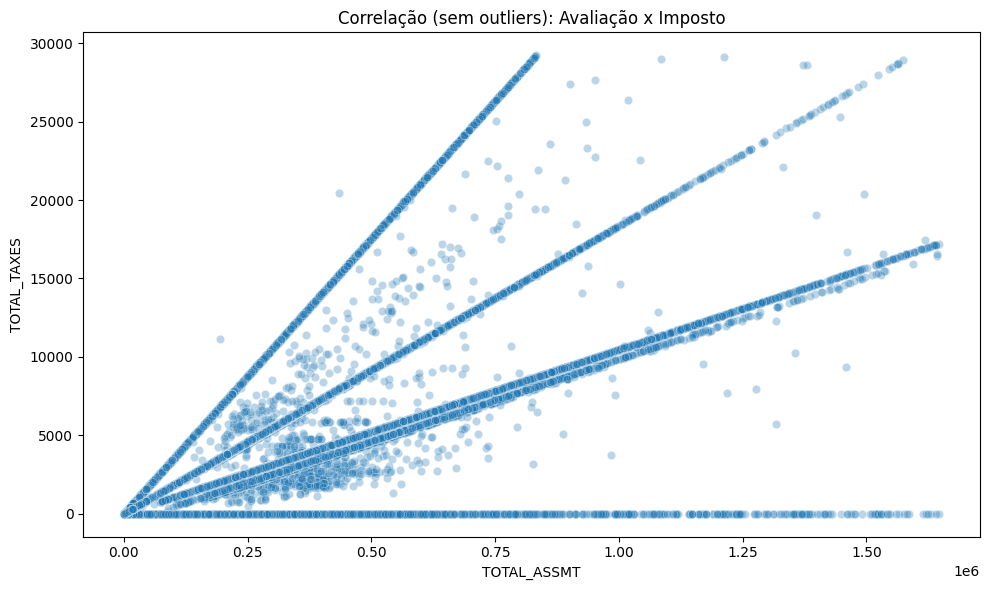

In [17]:
# Filtrar dados até o percentil 99
df_filtrado = df[df['TOTAL_ASSMT'] < df['TOTAL_ASSMT'].quantile(0.99)]
df_filtrado = df_filtrado[df_filtrado['TOTAL_TAXES'] < df_filtrado['TOTAL_TAXES'].quantile(0.99)]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtrado, x='TOTAL_ASSMT', y='TOTAL_TAXES', alpha=0.3)
plt.title("Correlação (sem outliers): Avaliação x Imposto")
plt.xlabel("TOTAL_ASSMT")
plt.ylabel("TOTAL_TAXES")
plt.tight_layout()
plt.show()

In [18]:
correlacao = df_filtrado[['TOTAL_ASSMT', 'TOTAL_TAXES']].corr()
print("Correlação entre TOTAL_ASSMT e TOTAL_TAXES:\n", correlacao)

Correlação entre TOTAL_ASSMT e TOTAL_TAXES:
              TOTAL_ASSMT  TOTAL_TAXES
TOTAL_ASSMT     1.000000     0.658617
TOTAL_TAXES     0.658617     1.000000


Quanto maior o valor do imóvel, maior tende a ser o imposto pago.

Isso confirma estatisticamente a primeira hipótese levantada:

Hipótese 1: Existe correlação entre valor do imóvel e imposto pago.
 Resultado: Confirmada (Correlação de 0.6586).

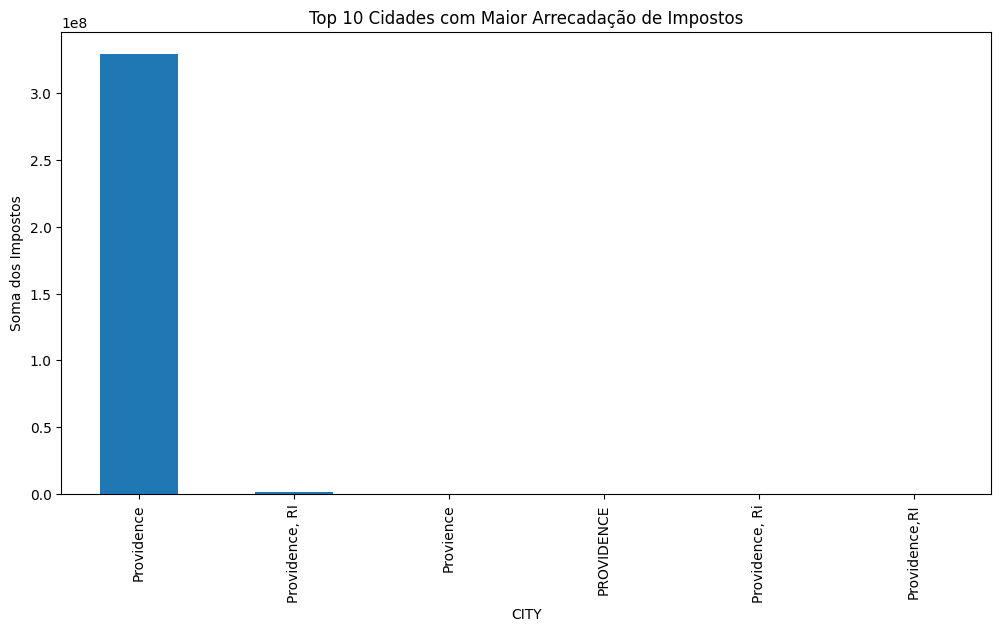

In [12]:
plt.figure(figsize=(12,6))
df.groupby('CITY')['TOTAL_TAXES'].sum().nlargest(10).plot(kind='bar')
plt.title("Top 10 Cidades com Maior Arrecadação de Impostos")
plt.ylabel("Soma dos Impostos")
plt.show()

In [19]:
# Agrupar por cidade e somar os valores
city_stats = df.groupby('CITY')[['TOTAL_ASSMT', 'TOTAL_TAXES']].sum().sort_values(by='TOTAL_ASSMT', ascending=False)

# Visualizar as 10 cidades com maior valor de avaliação
city_stats.head(10)

,TOTAL_ASSMT,TOTAL_TAXES
CITY,,
Providence,1.613606e+10,2.239238e+08
"Providence, RI",7.656570e+07,1.011812e+06
"Providence, Ri",6.282000e+05,5.970680e+03
PROVIDENCE,3.248000e+05,1.140048e+04
"Providence,RI",2.148000e+05,1.646720e+03


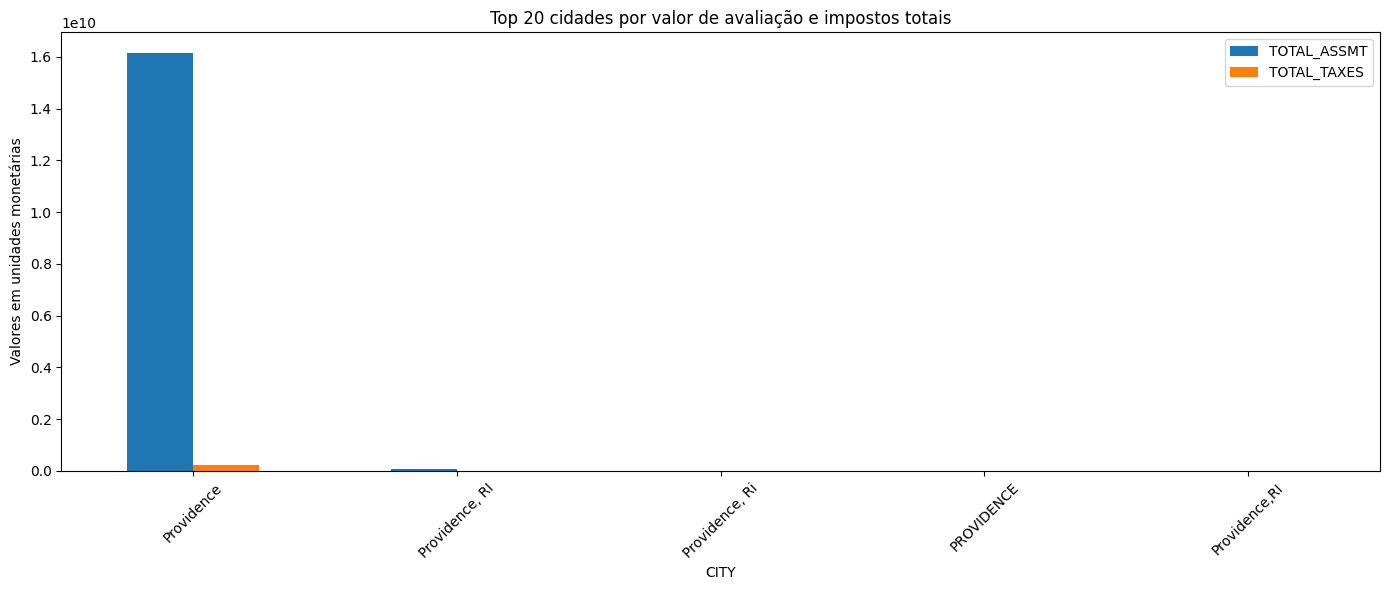

In [20]:
# Gráfico para visualização
city_stats.head(20).plot(kind='bar', figsize=(14,6))
plt.title("Top 20 cidades por valor de avaliação e impostos totais")
plt.ylabel("Valores em unidades monetárias")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# Correlação entre avaliação e impostos por cidade
corr = city_stats['TOTAL_ASSMT'].corr(city_stats['TOTAL_TAXES'])
print(f"Correlação entre valor avaliado e imposto total por cidade: {corr:.2f}")

Correlação entre valor avaliado e imposto total por cidade: 1.00


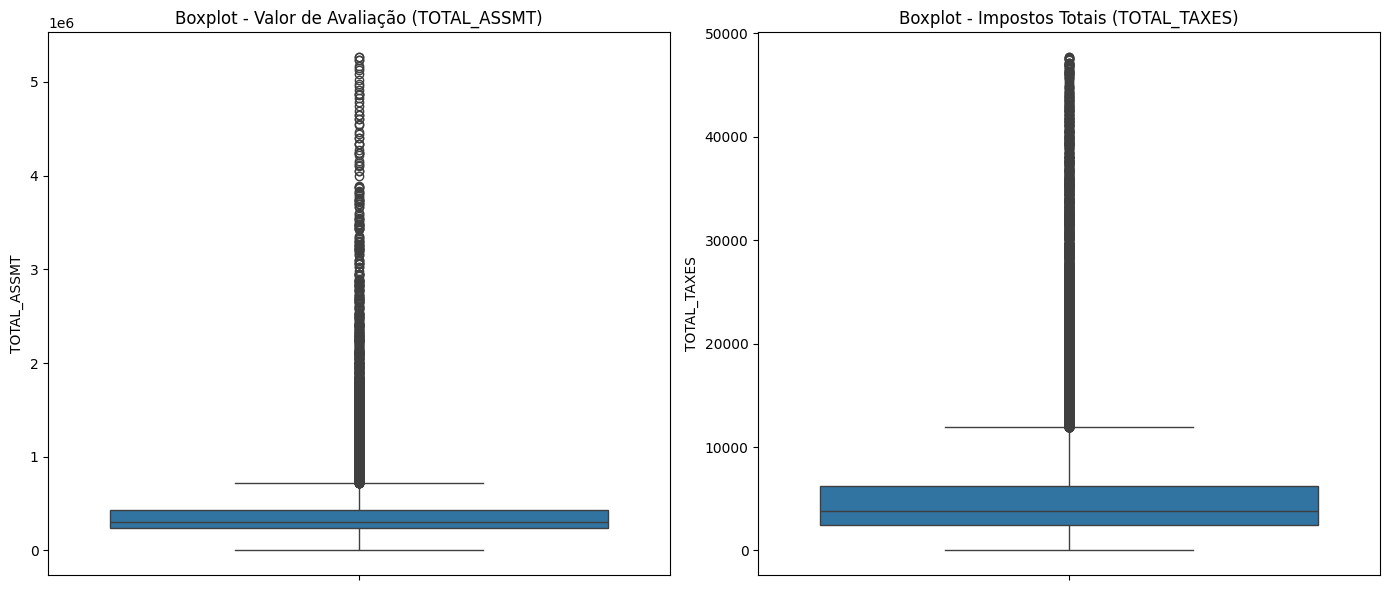

In [16]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['TOTAL_ASSMT'])
plt.title("Boxplot - Valor de Avaliação (TOTAL_ASSMT)")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['TOTAL_TAXES'])
plt.title("Boxplot - Impostos Totais (TOTAL_TAXES)")

plt.tight_layout()
plt.show()

## 3. Pré-processamento de Dados

In [13]:
# Remover registros com nulos
df = df[df['TOTAL_ASSMT'].notnull() & df['TOTAL_TAXES'].notnull()]

In [14]:
# Tratar outliers
df = df[df['TOTAL_ASSMT'] < df['TOTAL_ASSMT'].quantile(0.99)]
df = df[df['TOTAL_TAXES'] < df['TOTAL_TAXES'].quantile(0.99)]

In [15]:
# Normalização
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['TOTAL_ASSMT_norm', 'TOTAL_TAXES_norm']] = scaler.fit_transform(df[['TOTAL_ASSMT', 'TOTAL_TAXES']])
df[['TOTAL_ASSMT_norm', 'TOTAL_TAXES_norm']].head()

,TOTAL_ASSMT_norm,TOTAL_TAXES_norm
1,0.086583,0.175328
2,0.064140,0.074033
3,0.071184,0.144146
4,0.039437,0.079859
5,0.050545,0.102352


Criar variáveis derivadas (Feature Engineering)

In [23]:
df['TAX_PERC_ASSESSMENT'] = (df['TOTAL_TAXES'] / df['TOTAL_ASSMT']) * 100

In [24]:
print("Primeiras linhas com percentual de imposto sobre valor avaliado:")
print(df[['TOTAL_ASSMT', 'TOTAL_TAXES', 'TAX_PERC_ASSESSMENT']].head())

Primeiras linhas com percentual de imposto sobre valor avaliado:
   TOTAL_ASSMT  TOTAL_TAXES  TAX_PERC_ASSESSMENT
1     456000.0      8367.60             1.835000
2     337800.0      3533.24             1.045956
3     374900.0      6879.44             1.835007
4     207700.0      3811.32             1.835012
5     266200.0      4884.80             1.835011


Verificar correlação com novas features

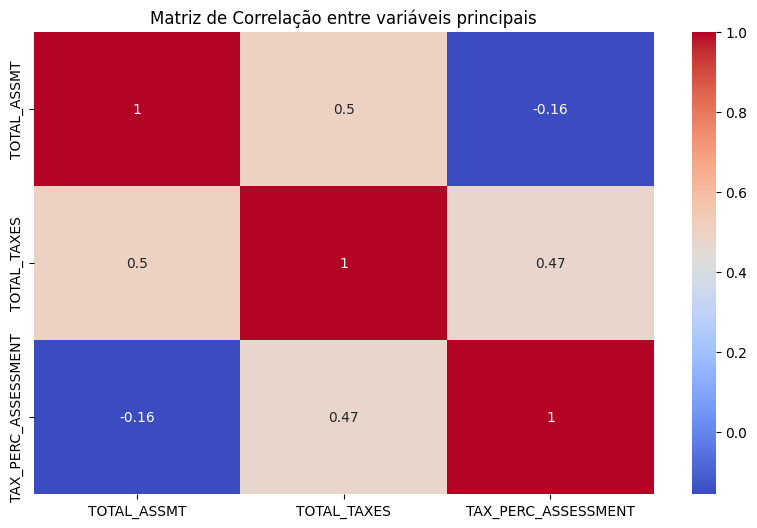

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df[['TOTAL_ASSMT', 'TOTAL_TAXES', 'TAX_PERC_ASSESSMENT']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação entre variáveis principais")
plt.show()

Redução de dimensionalidade

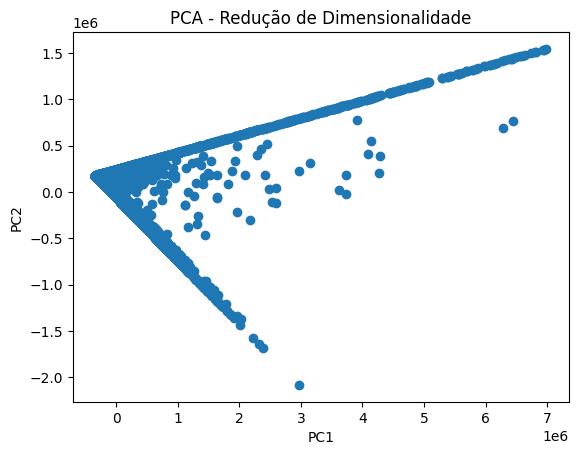

In [26]:
 from sklearn.decomposition import PCA
 numeric_df = df.select_dtypes(include='number').dropna()
 pca = PCA(n_components=2)
 pca_result = pca.fit_transform(numeric_df)
 plt.scatter(pca_result[:, 0], pca_result[:, 1])
 plt.title("PCA - Redução de Dimensionalidade")
 plt.xlabel("PC1")
 plt.ylabel("PC2")
 plt.show()

Verificação de dados faltantes

In [27]:
missing_data = df.isnull().sum()
print("\nDados faltantes por coluna:")
print(missing_data[missing_data > 0])


Dados faltantes por coluna:
CIVIC                     82
STREET                     1
SUFFIX                  1493
FORMATED_ADDRESS           1
CITY                      28
ZIP_POSTAL              1391
FIRST_NAME              8949
LAST_NAME               8890
COMPANY                34791
FREE_LINE_2                2
CIVIC 1                 1440
STREET 1                 931
S_SUFFIX                3240
UNIT                   38673
CITY 1                     6
STATE                     13
ZIP_POSTAL 1              36
TAX_PERC_ASSESSMENT        5
dtype: int64


### Conclusão
A análise exploratória realizada sobre os dados de avaliação de propriedades e impostos pagos permitiu validar parcialmente as hipóteses levantadas:

Correlação entre valor do imóvel e imposto pago: A matriz de correlação revelou uma relação moderadamente forte (r ≈ 0.66) entre o valor avaliado (TOTAL_ASSMT) e o valor dos impostos (TOTAL_TAXES). Essa tendência foi reforçada pelo gráfico de dispersão (sem outliers), que exibiu padrões lineares compatíveis com diferentes faixas de alíquota ou políticas fiscais.

Cidades com maior valor de avaliação concentram maior arrecadação: Os gráficos de barras mostraram que determinadas cidades concentram volumes elevados tanto de avaliação total quanto de impostos arrecadados, confirmando a hipótese de concentração fiscal em regiões com imóveis de maior valor.

Presença de outliers: A análise estatística (df.describe()) e os boxplots evidenciaram a existência de outliers significativos, especialmente nas variáveis TOTAL_ASSMT e TOTAL_TAXES. Esses valores extremos podem distorcer métricas como média e desvio padrão, sendo recomendável tratá-los com cuidado em análises futuras ou modelos preditivos.

Em resumo, a análise trouxe insights valiosos para políticas de arrecadação, mapeamento de desigualdades regionais e estruturação de alíquotas mais justas e eficientes.